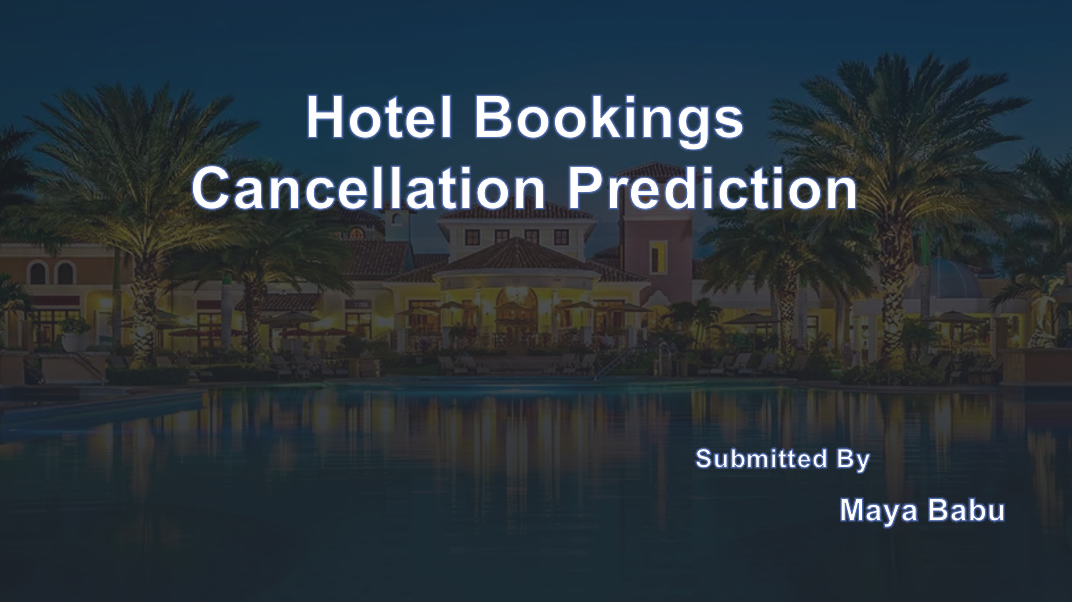

# Introduction 
Booking cancellations have a substantial impact on demand management decisions in the hospitality industry.Every year, more than 140 million bookings were made on the internet and many hotel bookings were booked through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc.To overcome the problems caused by booking cancellations, hotels implement rigid cancellation policies, inventory management, and overbooking strategies, which can also have a negative influence on revenue and reputation.
Once the reservation has been canceled, there is almost nothing to be done and it creates discomfort for many Hotels and Hotel Technology companies. Therefore, predicting reservations which might get canceled and preventing these cancellations will create a surplus revenue for both Hotels and Hotel Technology companies.

# Machine Learning Life Cycle
1. Understanding the Business Problem
2. Data Collection and Understanding
3. Data Exploration
4. Data Preparation
5. Modeling


# 1. Understanding Business Problem
The Goal of this project is to Predict the Guests who are likely to Cancel the Hotel Booking using Machine Learning with Python. Therefore, predicting reservations which might get canceled and preventing these cancellations will create a surplus revenue, better forecasts and reduce uncertainty in business management decisions.

### Assumptions 
1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used 
2. The information is still current and can be used to analyze a hotels possible plan in an efficient manner 
3. There are no unantiipated negative to the hotel employing any advised technique 
4. The hotel are not currently using any of the suggested solution 
5. The biggest factor affecting the effectiveness of earning income is booking cancellation 
6. clients make reserations the same year they make cancellations 

### Research Questions 
1. What are the variables that affect the hotel reservations cancellation?
2. How can we make hotels reservations cancellation lower?
3. How will hotels be assisted in making and promotional decisions?

### Hypothesis 
1. More cancellations occur when price are higher 
2. When there is longer waiting list, customers tend to cancel more freuently 
3. The majority of clients are coming form offline travel agents to make their reservations 

# 2. Data Collection and Understanding

I have collected the dataset from the kaggle. Dataset is available at Kaggle Dataset

This data set consists of 119,390 observations and holds booking data for a city hotel and a resort hotel in Portugal from 2015 to 2017. It has 32 variables which include reservation and arrival date, length of stay, canceled or not, the number of adults, children, or babies, the number of available parking spaces, how many special guests, companies, and agents pushed the reservation, etc.

There are many aspects considered when choosing a hotel. The main idea is to find the appropriate prediction model for predicting hotel booking cancellations which finds the finest explaining variables for customer cancellations. This Hotel Booking Cancellation model can be useful not only for the vacationer but for the hotels’ owners.

1. hotel :(H1 = Resort Hotel or H2 = City Hotel).
2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).
3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
4. arrival_date_year: Year of arrival date.
5. arrival_date_month: The months in which guests are coming.
6. arrival_date_week_number: Week number of year for arrival date.
7. arrival_date_day_of_month: Which day of the months guest is arriving.
8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.
10. adults: Number of adults.
11. children: Number of children.
12. babies: Number of babies.
13. meal: Type of meal booked.
14. country: Country of origin.
15. market_segment: Through which channel hotels were booked.
16. distribution_channel: Booking distribution channel.
17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).
18. previous_cancellations: Show if the repeated guest has cancelled the booking before.
19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.
20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.
22. booking_changes: How many times did booking changes happen.
23. deposit_type: Indication on if the customer deposited something to confirm the booking.
24. agent: If the booking happens through agents or not.
25. company: If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.
26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.
27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.
28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.
29. required_car_parking_spaces: How many parking areas are necessary for the customers.
30. total_of_special_requests: Total unique requests from consumers.
31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out
32. reservation_status_date: The last status date.


# 3. Data Exploration
In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Cancellations by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 32)

### Load the dataset

In [2]:
hotels_df = pd.read_csv('hotel_bookings.csv')

hotels_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

### Describing the dataset

In [3]:
print("Data set shape =", hotels_df.shape)

Data set shape = (119390, 32)


In [4]:
hotels_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [5]:
#unnique values in 'hotel' column

hotels_df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [6]:
#display all the columns

hotels_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#Let use the describe function to check for any other information that might be relevant for our data cleaning and transformation in the dataset

hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
hotels_df.describe(include='all')
#By assigning include attribute a value of ‘all’, we make sure that categorical features are also included in the result.

hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults       children         babies  \
count          119390.000000  119390.000000  119386.000000  119390.000000   
unique                   NaN            NaN            NaN            NaN   
top                      NaN            NaN            NaN            NaN   
freq                     NaN            NaN            NaN            NaN   
mean                2.500302       1.856403       0.103890       0.007949   
std                 1.908286       0.579261       0.398561       0.097436   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 1.000000       2.000000       0.000000       0.000000   
50%                 2.000000       2.000000       0.000000       0.000000   
75%                 3.000000       2.000000       0.000000       0.000000   
max                50.000000      55.000000      10.000000      10.000000   

          meal country market_segment distribution_channel  is_repeated_guest  \
count   119390  118902         119390               119390      119390.000000   
unique       5     177              8                    5                NaN   
top         BB     PRT      Online TA                TA/TO                NaN   
freq     92310   48590          56477                97870                NaN   
mean       NaN     NaN            NaN                  NaN           0.031912   
std        NaN     NaN            NaN                  NaN           0.175767   
min        NaN     NaN            NaN                  NaN           0.000000   
25%        NaN     NaN            NaN                  NaN           0.000000   
50%        NaN     NaN            NaN                  NaN           0.000000   
75%        NaN     

# EDA - Exploratory Data Analysis

In [9]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

## Visualizing the data

### Percentage distribution of observations by hotel 

[Text(0.5, 1.0, 'Percentage of guests at the resort and city hotel ')]

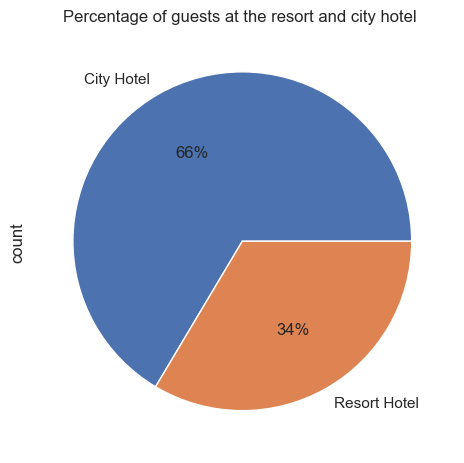

In [10]:
fig1 = hotels_df['hotel'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'Percentage of guests at the resort and city hotel ')

[Text(0.5, 1.0, 'Percentage of guests that canceled their order ')]

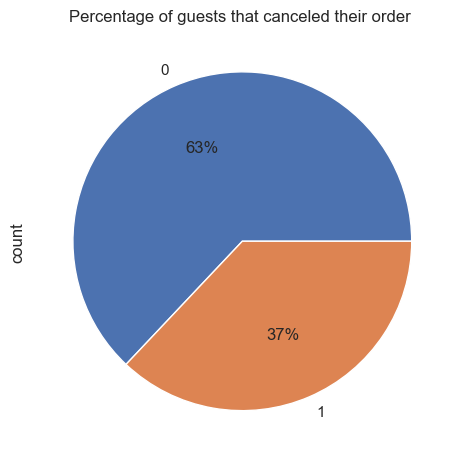

In [11]:
fig1 = hotels_df['is_canceled'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'Percentage of guests that canceled their order ')

[Text(0.5, 1.0, 'Percentage of repeated guests ')]

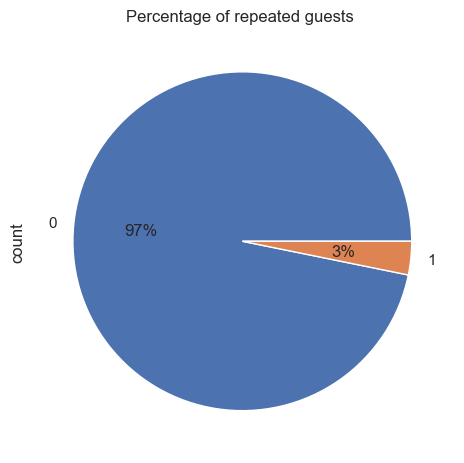

In [12]:
fig1 = hotels_df['is_repeated_guest'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'Percentage of repeated guests ')

[Text(0.5, 1.0, 'cancelations by hotel')]

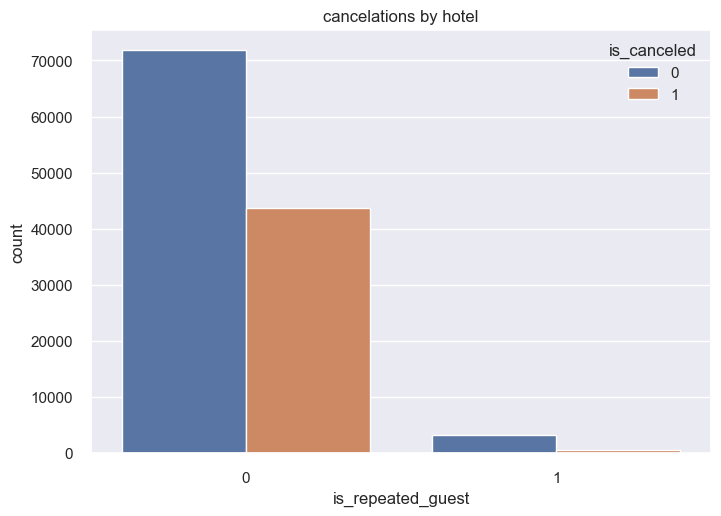

In [13]:
sns.countplot(data=hotels_df, x = 'is_repeated_guest', hue='is_canceled').set(title='cancelations by hotel')

[Text(0.5, 1.0, 'cancelations by hotel')]

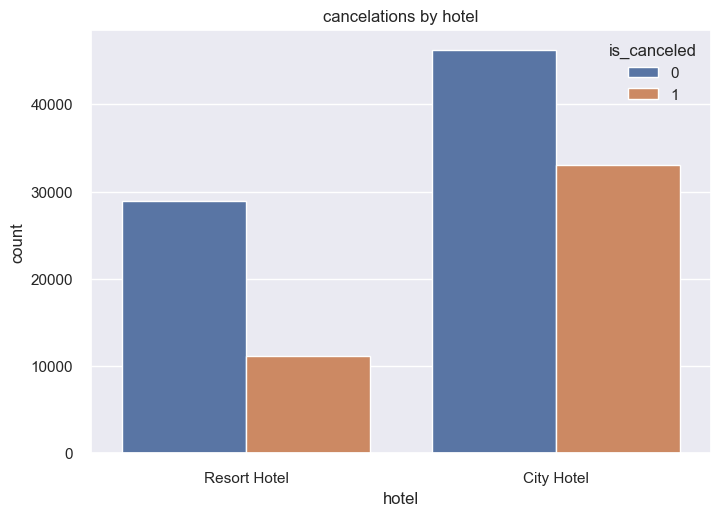

In [14]:
sns.countplot(data=hotels_df, x = 'hotel', hue='is_canceled').set(title='cancelations by hotel')

- There is a higher rate of cancelations at the city hotel

Text(0, 0.5, 'count')

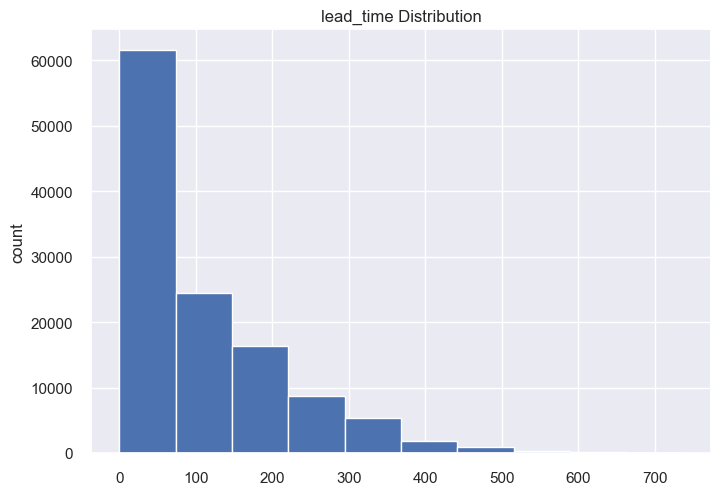

In [15]:
fig = hotels_df['lead_time'].hist(bins = 10)
plt.title("lead_time Distribution")
plt.ylabel("count")

In [16]:
bins = [0, 50, 100, 150, 200, 250, 300, 350]
hotels_df['is_canceled'].groupby(pd.cut(hotels_df['lead_time'], bins)).mean()

lead_time
(0, 50]       0.248139
(50, 100]     0.402507
(100, 150]    0.441751
(150, 200]    0.458928
(200, 250]    0.479762
(250, 300]    0.599579
(300, 350]    0.687762
Name: is_canceled, dtype: float64

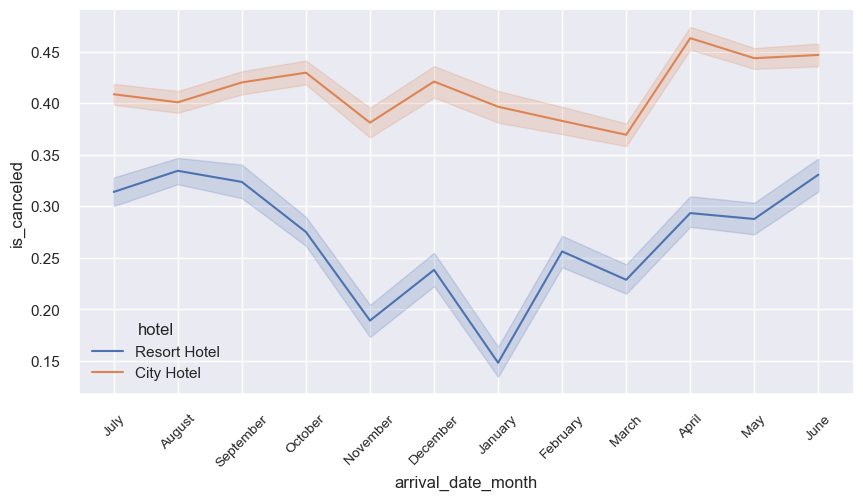

In [17]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=hotels_df, x= 'arrival_date_month', y = 'is_canceled', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

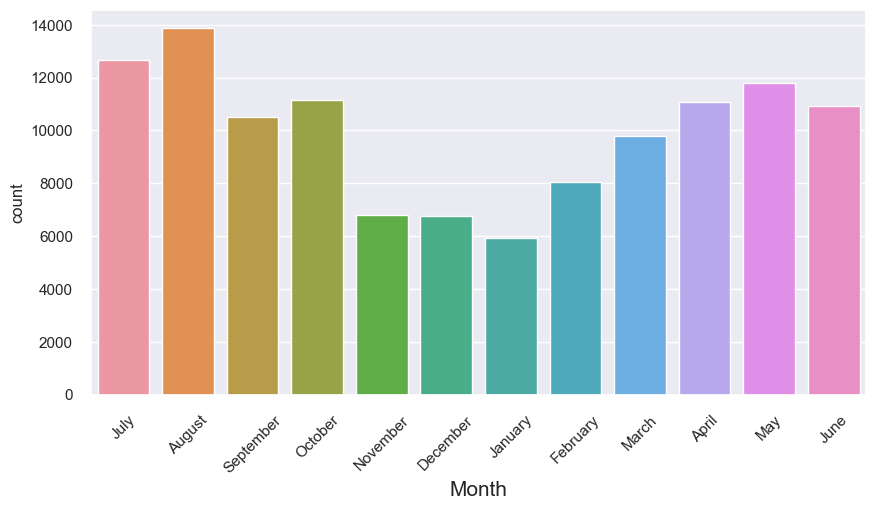

In [18]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=hotels_df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

[Text(0.5, 1.0, '')]

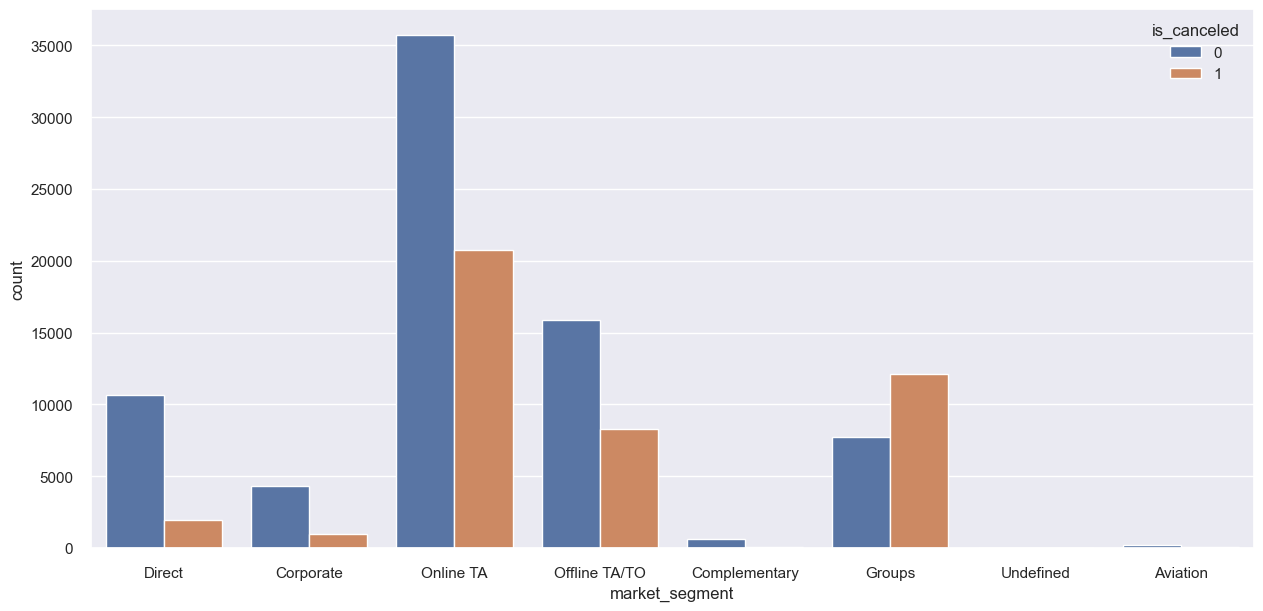

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(data=hotels_df, x = 'market_segment', hue='is_canceled').set(title='')

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(data=hotels_df, x = 'distribution_channel', hue='is_canceled').set(title='')

[Text(0.5, 1.0, '')]

[Text(0.5, 1.0, 'number of previous cancelation ')]

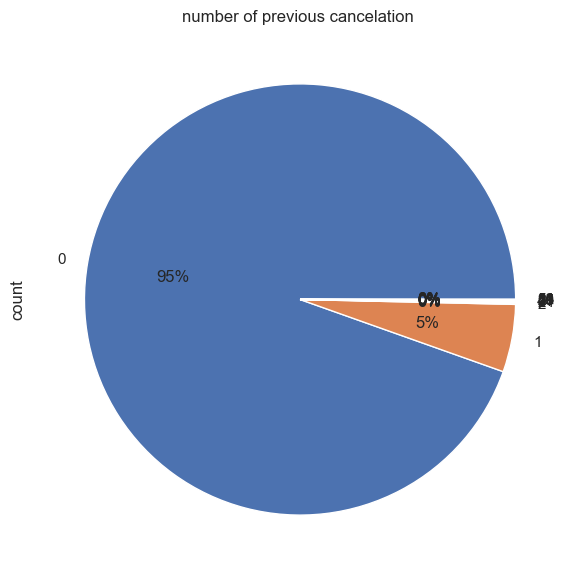

In [21]:
plt.figure(figsize=(15,7))
fig1 = hotels_df['previous_cancellations'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'number of previous cancelation ')

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=hotels_df, x = 'previous_cancellations', hue='is_canceled').set(title='')

[Text(0.5, 1.0, '')]

[Text(0.5, 1.0, 'Percentage of number of previous bookings that were not canceled ')]

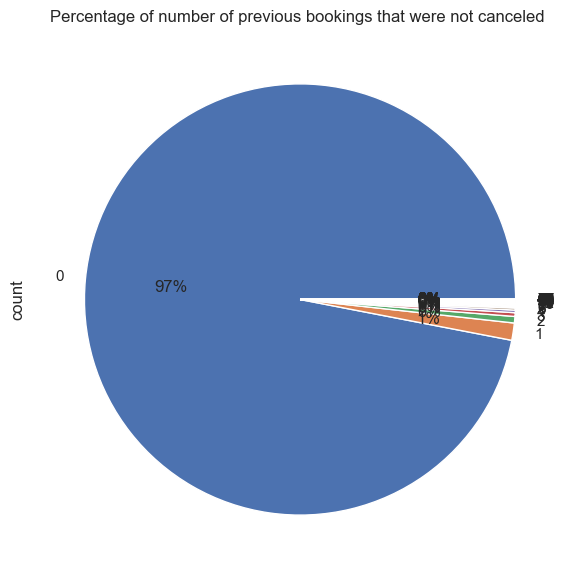

In [23]:
plt.figure(figsize=(15,7))
fig1 = hotels_df['previous_bookings_not_canceled'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'Percentage of number of previous bookings that were not canceled ')

[Text(0.5, 1.0, 'Percentage of guests at the resort and city hotel ')]

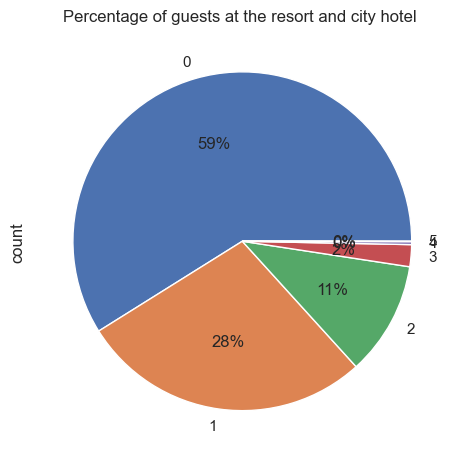

In [24]:
fig1 = hotels_df['total_of_special_requests'].value_counts().plot.pie(autopct = "%1.0f%%");
fig1.set(title = 'Percentage of guests at the resort and city hotel ')

# 4. Data Preparation

After exploring the dataset, we will find a lot of information that will help to prepare the data. Most important steps in Data Preparation are:

1. Handling Missing Values
2. Exploring Numerical and Categorical Features
3. Feature Engineering (Encoding Categorical Features)
4. Feature Selection (Correlation Heat Map)

### 4.1 Handling Missing Values

In [25]:
#visualising missing data
print("Data set missing data:\n", hotels_df.isna().sum())

Data set missing data:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                            

In [26]:
# Check % of Missing Values in the Data set
feature_nan = [feature for feature in hotels_df.columns if hotels_df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(hotels_df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


- “Company” feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the “Company” feature.
- “Agent” feature has 13.69% missing values. “Agent” feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Therefore, missing data for “Agent” can be filled by 0.
- “Country” feature has 0.4% missing values. Since missing data of “Country” is less than 1%, we can will impute with most frequent value (Mode).
- “Children” feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [27]:
hotels_df['country'].mode()

0    PRT
Name: country, dtype: object

In [28]:
hotels_df['agent'].mean()

86.69338185346919

In [29]:
hotels_df['company'].mean()

189.26673532440782

In [30]:
# Filling null values with mode value for categorical variables
hotels_df['country'].fillna(0, inplace = True)

# Filling null values with mean value for categorical variables
hotels_df['agent'].fillna(value = hotels_df['agent'].mean(), inplace=True)
hotels_df['company'].fillna(value = hotels_df['company'].mean(), inplace=True)
hotels_df['children'].fillna(value = hotels_df['children'].mean(), inplace=True)

In [31]:
#Check that no null data left
print("Data set missing data:\n", hotels_df.isna().sum())

Data set missing data:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr 

In [32]:
# Check if there are rows where the total number of nights is null
nights_total = (hotels_df.stays_in_weekend_nights == 0) & (hotels_df.stays_in_week_nights == 0)
hotels_df[nights_total]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
167     Resort Hotel            0        111               2015   
168     Resort Hotel            0          0               2015   
196     Resort Hotel            0          8               2015   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               2017   
117701    City Hotel            0          0               2017   
118029    City Hotel            0          0               2017   
118631    City Hotel            0         78               2017   
118963    City Hotel            0          1               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
167                  July                        28   
168                  July                        28   
196                  July                        28   
...                   ...                       ...   
115483               July                        27   
117701             August                        32   
118029             August                        33   
118631             August                        34   
118963             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
167                             6                        0   
168                             6                        0   
196                             7                        0   
...                           ...                      ...   
115483                          6                        0   
117701                          8                        0   
118029                         14                        0   
118631                         23                        0   
118963                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
167                        0       2       0.0       0   BB     PRT   
168                        0       1       0.0       0   BB     PRT   
196                        0       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
115483                     0       1       0.0       0   SC     FRA   
117701                     0       2       0.0       0   BB     PRT   
118029                     0       2       0.0       0   BB     PRT   
118631                     0       1       0.0       0   BB     PRT   
118963                     0       2       0.0       0   BB     PRT   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
167         Online TA                TA/TO                  0   
168            Direct               Direct                  0   
196            Direct               Direct                  0   
...               ...                  ...                ...   
115483         Direct               Direct                  0   
117701  Offline TA/TO                TA/TO                  1   
118029         Direct               Direct                  1   
118631  Offline TA/TO                TA/TO                  0   
118963         Direct               Direct                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [33]:
#remove those rows where total number of nights is null
hotels_df = hotels_df.loc[~nights_total]
hotels_df

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
5                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

In [34]:
hotels_df.shape

(118675, 32)

In [35]:
# check if there are rows where the total number of guests is null
guests_total = (hotels_df.children == 0) & (hotels_df.adults == 0) & (hotels_df.babies == 0)
hotels_df[guests_total]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
31765   Resort Hotel            0         31               2016   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
3181             November                        47   
3684             December                        53   
3708             December                        53   
31765            December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
31765                          27                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
31765                      8       0       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
31765          Direct               Direct                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
3181                         0        

In [36]:
#remove those rows where total number of guests is null
hotels_df = hotels_df.loc[~guests_total]
hotels_df

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
5                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

In [37]:
hotels_df.shape

(118565, 32)

### 4.2 Exploring Numerical Features & categorical variables

In [38]:
num_feature = [feature for feature in hotels_df.columns if hotels_df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  20


In [39]:
hotels_df[num_feature][:5]

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   
5            0         14               2015                        27   
6            0          0               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   
5                          1                        0                     2   
6                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   
5       2       0.0       0                  0                       0   
6       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes       agent     company  \
2                               0                0   86.693382  189.266735   
3                               0                0  304.000000  189.266735   
4                               0                0  240.000000  189.266735   
5                               0                0  240.000000  189.266735   
6                               0                0   86.693382  189.266735   

   days_in_waiting_list    adr  required_car_parking_spaces  \
2                     0   75.0                            0   
3                     0   75.0                            0   
4                     0   98.0                            0   
5                     0   98.0                            0   
6                     0  107.0                            0   

   total_of_special_requests  
2                          0  
3                          0  
4                          1  
5                          1  
6                          0

In [40]:
cat_feature = [feature for feature in hotels_df.columns if hotels_df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [41]:
hotels_df[cat_feature][:5]

hotel arrival_date_month meal country market_segment  \
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   
5  Resort Hotel               July   BB     GBR      Online TA   
6  Resort Hotel               July   BB     PRT         Direct   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   
5                TA/TO                  A                  A   No Deposit   
6               Direct                  C                  C   No Deposit   

  customer_type reservation_status reservation_status_date  
2     Transient          Check-Out                7/2/2015  
3     Transient          Check-Out                7/2/2015  
4     Transient          Check-Out                7/3/2015  
5     Transient          Check-Out                7/3/2015  
6     Transient          Check-Out                7/3/2015

### 4.3 Feature Engineering & Selection

Text(0.5, 1.0, 'Correlation Graph')

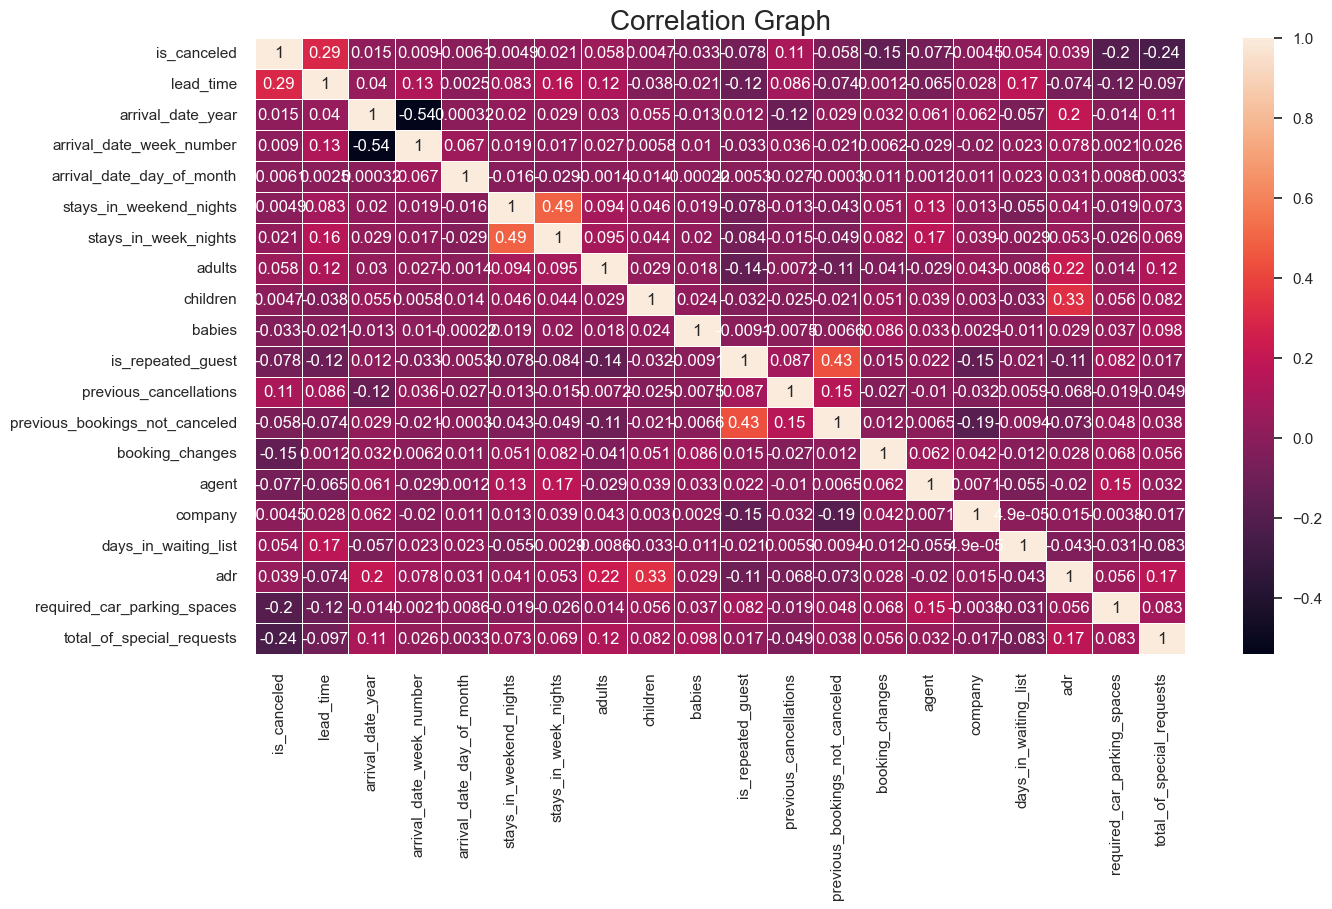

In [42]:
# Drop non-numeric columns
numeric_columns = hotels_df.select_dtypes(include=['number'])

# Check if there are any remaining non-numeric columns
non_numeric_columns = hotels_df.select_dtypes(exclude=['number'])
if not non_numeric_columns.empty:
    print("Warning: Non-numeric columns exist and will be dropped from correlation analysis.")

# Compute correlation heatmap
plt.figure(figsize=(15, 8))
corr_tot = sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.7)
corr_tot.set_title('Correlation Graph', fontdict={'fontsize': 20})


#### We can see that the highest corellated atributes to 'is canceled' are: 
#### 1. lead_time, 
#### 2. previous_cancelations, 
#### 3. booking_changes, 
#### 4. required_car_parking_spaces, 
#### 5. total_of_special_requests

In [43]:
#Splitting "Reservation status date" column 

In [44]:
hotels_df['reservation_status_date'] = pd.to_datetime(hotels_df['reservation_status_date'])

hotels_df['res_status_year'] = hotels_df['reservation_status_date'].dt.year
hotels_df['res_status_month'] = hotels_df['reservation_status_date'].dt.month
hotels_df['res_status_day'] = hotels_df['reservation_status_date'].dt.day

In [45]:
hotels_df.drop('reservation_status_date', axis = 1, inplace = True)

In [46]:
hotels_df.shape

(118565, 34)

[Text(0.5, 1.0, '')]

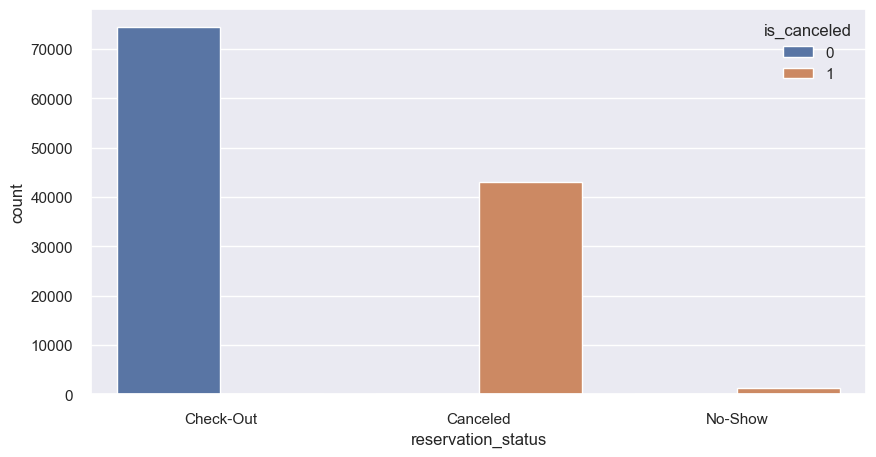

In [47]:
# Visualise correlation of "is_cancelled" with "reservation status"
plt.figure(figsize=(10,5))
sns.countplot(data=hotels_df, x = 'reservation_status', hue='is_canceled').set(title='')

"reservation_status" column basically repeats the data of "is_cancelled" column, therefore we will drop it

### Drop unimportant columns

In [48]:
columns_to_drop = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list', 'res_status_day']

hotels_df.drop(columns_to_drop, axis = 1, inplace = True)

In [49]:
hotels_df.shape

(118565, 27)

## Changing categorical columns to dummy variables

In [50]:
hotels_df['hotel'] = hotels_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

hotels_df['meal'] = hotels_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

hotels_df['market_segment'] = hotels_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

hotels_df['distribution_channel'] = hotels_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

hotels_df['reserved_room_type'] = hotels_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

hotels_df['deposit_type'] = hotels_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

hotels_df['customer_type'] = hotels_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
hotels_df['arrival_date_month'] = hotels_df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [51]:
hotels_df.shape

(118565, 27)

In [52]:
hotels_df.var()

hotel                                 0.222628
is_canceled                           0.233768
lead_time                         11430.928201
arrival_date_month                    9.529534
arrival_date_week_number            184.670443
arrival_date_day_of_month            77.127519
stays_in_weekend_nights               0.990944
stays_in_week_nights                  3.584426
adults                                0.331133
children                              0.159296
babies                                0.009518
meal                                  1.138612
market_segment                        2.018508
distribution_channel                  0.461872
is_repeated_guest                     0.028641
previous_cancellations                0.717701
previous_bookings_not_canceled        2.252098
reserved_room_type                    1.266675
deposit_type                          0.971404
agent                             10595.574617
company                             979.678865
customer_type

In [53]:
#normalizing variables to the same scale
hotels_df['lead_time'] = np.log(hotels_df['lead_time'] + 1)
hotels_df['arrival_date_month'] = np.log(hotels_df['arrival_date_month'] + 1)
hotels_df['arrival_date_week_number'] = np.log(hotels_df['arrival_date_week_number'] + 1)
hotels_df['arrival_date_day_of_month'] = np.log(hotels_df['arrival_date_day_of_month'] + 1)
hotels_df['agent'] = np.log(hotels_df['agent'] + 1)
hotels_df['company'] = np.log(hotels_df['company'] + 1)
hotels_df['adr'] = np.log(hotels_df['adr'] + 1)
hotels_df['res_status_month'] = np.log(hotels_df['res_status_month'] + 1)

In [54]:

# Assuming hotels_df is your DataFrame
# Create a boolean mask to identify NaN values in the DataFrame
is_NaN = hotels_df.isnull()

# Use the boolean mask to filter rows with NaN values
hotels_df[is_NaN.any(axis=1)]


hotel  is_canceled  lead_time  arrival_date_month  \
14969      0            0   5.278115            1.386294   

       arrival_date_week_number  arrival_date_day_of_month  \
14969                  2.397895                   1.791759   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
14969                        4                     6       2       0.0   

       babies  meal  market_segment  distribution_channel  is_repeated_guest  \
14969       0     0               5                     0                  1   

       previous_cancellations  previous_bookings_not_canceled  \
14969                       0                               2   

       reserved_room_type  deposit_type     agent   company  customer_type  \
14969                   1             0  5.613128  5.248427              2   

       adr  required_car_parking_spaces  total_of_special_requests  \
14969  NaN                            0                          0   

       res_status_year  res_status_month  
14969             2017          1.386294

In [55]:
hotels_df['adr'] = hotels_df['adr'].fillna(value = hotels_df['adr'].mean())

In [56]:
hotels_df.drop([14969], inplace = True)

In [57]:
# Let's sum up what I have done so far - 
# I read the data. 

# Started cleaning the data - 
# Calculated mean of agents, company, children and filled the 'nan' values.
# Then I noticed that there are zero and nan values for the 'no nights' columns. 
# Hence it's impossible I removed those rows. 
# The same manipulations I did for 'guests_total' and 'children'. 
# In the end I left with 118565 rows and 32 columns (one of them is target).

# Then started the EDA section - 
# First thing I did was running the correlation function. 
# Saw 5 key dominant columns with high values. 
# Lead time, previous cancellations, booking changes, 
# required car parking spaces and total of special requests.
# Then we made some graphs that showed the correlation I saw earlier.
# (Lead time VS is_cancelled)
# (Special requests VS is_cancelled)
# In addition I also made more graphs describing and showing the other columns.

# Then - I noticed the "reservation_status_date" column. 
# For higher convinience I decided to break this column in 3 - year, month and day. 
# Then I ran a correlation between the 3 values and the "is_cancelled" column and 
# saw that the correlation of day is very low.
# This manipulation caused us to add 3 columns and drop 1.
# So in the end I remained with 34 columns. 

# Afterward I decided to drop all the irrelevant columns (low rorrelation):
# 'days_in_waiting_list', 'arrival_date_year', 
# 'assigned_room_type', 'booking_changes',
# 'reservation_status', 'country', 'days_in_waiting_list', 'res_status_day'.

# So, now, I have 26 columns (one of them is target).

# Then I started the "fun" part - dummy variables. 
# I have 9 columns with "string" values that must be converted to integer values.
# The columns are - 'hotel', 'meal', 'market_segment', 'distribution channel', 
# 'reserved room type', 'deposit type', 'customer type', 'arrival date month', 
# 'reservation status'.

# Converting them to dummy variables left me with 27 columns.

# I wanted the values to be in the same range value, so I ran the variance function
# and decide to run a log functions to make the same range.

# Before running the models, I checked one last time if there were any nan / null values.
# Found out that there is one row - and removed it.

# Now let's start the models. 


# 5.Model Building

## Logistic Regeression

In [58]:
# First we need to separate the taget column with the rest of the data

In [59]:
Y = hotels_df['is_canceled']
hotels_df.drop('is_canceled', axis = 1, inplace = True)

In [60]:
X = hotels_df

In [61]:
# Splitting the data to train and test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=40)

In [63]:
Y.value_counts()

is_canceled
0    74388
1    44176
Name: count, dtype: int64

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7986786617936463
Confusion Matrix : 
[[20966  1424]
 [ 5737  7443]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.85     22390
           1       0.84      0.56      0.68     13180

    accuracy                           0.80     35570
   macro avg       0.81      0.75      0.76     35570
weighted avg       0.81      0.80      0.79     35570



## Decision Tree

In [65]:
from sklearn.metrics import accuracy_score
from sklearn import tree


clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4)
clf.fit(X_train, y_train)

y_predict_tree = clf.predict(X_test)

acc_clf = accuracy_score(y_test, y_predict_tree)
roc_auc_clf = roc_auc_score(y_test, y_predict_tree)
conf = confusion_matrix(y_test, y_predict_tree)
clf_report = classification_report(y_test, y_predict_tree)

print(f"Accuracy Score of Decision Tree is : {acc_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7688501546246838
Confusion Matrix : 
[[22384     6]
 [ 8216  4964]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     22390
           1       1.00      0.38      0.55     13180

    accuracy                           0.77     35570
   macro avg       0.87      0.69      0.70     35570
weighted avg       0.83      0.77      0.73     35570



## Random Forest Classifier

In [66]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
roc_auc_rd_clf = roc_auc_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9374472870396402
Confusion Matrix : 
[[21999   391]
 [ 1834 11346]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     22390
           1       0.97      0.86      0.91     13180

    accuracy                           0.94     35570
   macro avg       0.94      0.92      0.93     35570
weighted avg       0.94      0.94      0.94     35570



## Comparing Models

In [67]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr, acc_clf, acc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  Random Forest Classifier  0.937447
0       Logistic Regression  0.798679
1  Decision Tree Classifier  0.768850

In [68]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', title = 'Models Comparison')

## Comparisions based on ROC-AUC score

In [69]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [roc_auc_lr, roc_auc_clf, roc_auc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  Random Forest Classifier  0.921693
0       Logistic Regression  0.750560
1  Decision Tree Classifier  0.688182

In [70]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', title = 'Models Comparison')